In [23]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np

In [91]:
raw_data = pd.read_pickle("data_bio482.pkl")

In [93]:
data_processed = raw_data.drop(["Sweep_PassiveContactTimes", "Sweep_ActiveContactTimes"], axis=1)
data_processed

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Mouse_Sex,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [95]:
columns_with_arrays = [
    "Sweep_MembranePotential",
    "Sweep_QuietTimes",
    "Sweep_WhiskerAngle",
    "Sweep_WhiskingTimes",
]

In [101]:
data_processed[data_processed.columns.difference(columns_with_arrays)] = data_processed[data_processed.columns.difference(columns_with_arrays)].replace('nan', np.nan)

In [102]:
data_processed

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Mouse_Sex,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [103]:
data_free_whisking = data_processed[data_processed['Sweep_Type']=='free whisking']

<Axes: >

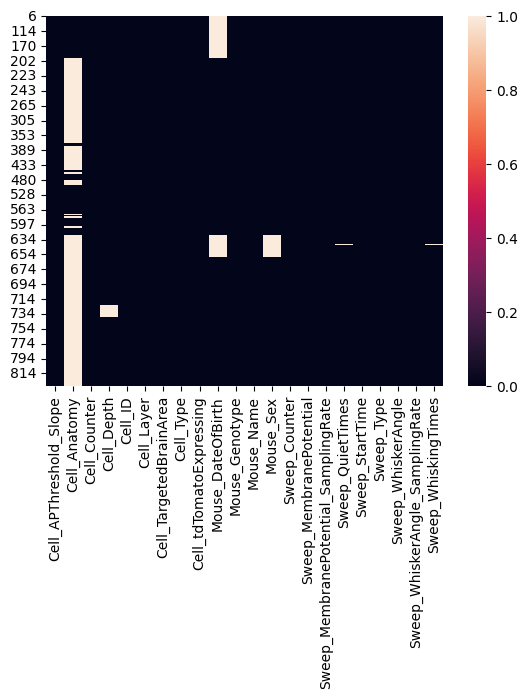

In [104]:
sns.heatmap(data_free_whisking.isna())

In [119]:
np.unique(data_free_whisking['Sweep_Type'])

array(['free whisking'], dtype=object)

In [120]:
questionable_predictors = [
    # 'Cell_APThreshold_Slope',
    'Cell_Anatomy',
    'Cell_Counter',
    # 'Cell_Depth',
    'Cell_ID',
    # 'Cell_Layer',
    'Cell_TargetedBrainArea',
    # 'Cell_Type',
    # 'Cell_tdTomatoExpressing',
    'Mouse_DateOfBirth',
    'Mouse_Genotype',
    'Mouse_Name',
    'Mouse_Sex',
    'Sweep_Counter',
    'Sweep_MembranePotential', # Array
    'Sweep_MembranePotential_SamplingRate',
    'Sweep_QuietTimes', # Array
    'Sweep_StartTime',
    'Sweep_Type',
    'Sweep_WhiskerAngle', # Array
    'Sweep_WhiskerAngle_SamplingRate',
    'Sweep_WhiskingTimes' # Array
]

In [121]:
keep_predictors = [
    'Cell_APThreshold_Slope',
    # 'Cell_Anatomy',
    # 'Cell_Counter',
    'Cell_Depth',
    # 'Cell_ID',
    'Cell_Layer',
    # 'Cell_TargetedBrainArea',
    'Cell_Type',
    'Cell_tdTomatoExpressing',
    # 'Mouse_DateOfBirth',
    # 'Mouse_Genotype',
    # 'Mouse_Name',
    # 'Mouse_Sex',
    # 'Sweep_Counter',
    # 'Sweep_MembranePotential', # Array
    # 'Sweep_MembranePotential_SamplingRate',
    # 'Sweep_QuietTimes', # Array
    # 'Sweep_StartTime',
    # 'Sweep_Type',
    # 'Sweep_WhiskerAngle', # Array
    # 'Sweep_WhiskerAngle_SamplingRate',
    # 'Sweep_WhiskingTimes' # Array
]

In [125]:
data_free_whisking[keep_predictors]

,Cell_APThreshold_Slope,Cell_Depth,Cell_Layer,Cell_Type,Cell_tdTomatoExpressing
6,10.0,229.0,L2/3,EXC,False
7,10.0,350.0,L2/3,EXC,False
8,10.0,350.0,L2/3,EXC,False
9,10.0,350.0,L2/3,EXC,False
13,10.0,244.0,L2/3,EXC,False
...,...,...,...,...,...
826,20.0,196.0,L2/3,SST,True
827,20.0,196.0,L2/3,SST,True
828,20.0,196.0,L2/3,SST,True
829,20.0,196.0,L2/3,SST,True


In [124]:
data_free_whisking[keep_predictors].dropna().shape, data_free_whisking[keep_predictors].shape

((480, 5), (497, 5))

In [ ]:
pca = PCA()

